# Decision Tree Implementation on Titanic dataset 

In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [5]:
#Drop unnescessary columns
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]

data_clean = data.drop(columns_to_drop, axis=1)

In [6]:
data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [7]:
#Now we have removed the unnescessary columns

In [8]:
#Step-2-> Make the sex column strings to numbers
#Male - 1
#Female - 0
#we will do it by Label Encoder from sklearn

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [10]:
data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
#As we can see from the info , Age has some NAN values , we have to fill it
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [14]:
#Perfecto!

In [15]:
data_clean.loc[2] #Access data at 2nd row

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [16]:
#Spliting the data into input and output
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']

X = data_clean[input_cols]
Y = data_clean[output_cols]

In [17]:
print(X.shape, Y.shape)

(891, 6) (891, 1)


## Implementation

In [18]:
#sklearn implementation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y);

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
sk_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [23]:
sk_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
sk_tree.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [25]:
sk_tree.score(X_test, Y_test)

0.8026905829596412

## Visualization of Decision tree

In [26]:
#importing nescessary libraries
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

In [27]:
dot_data = export_graphviz(sk_tree, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

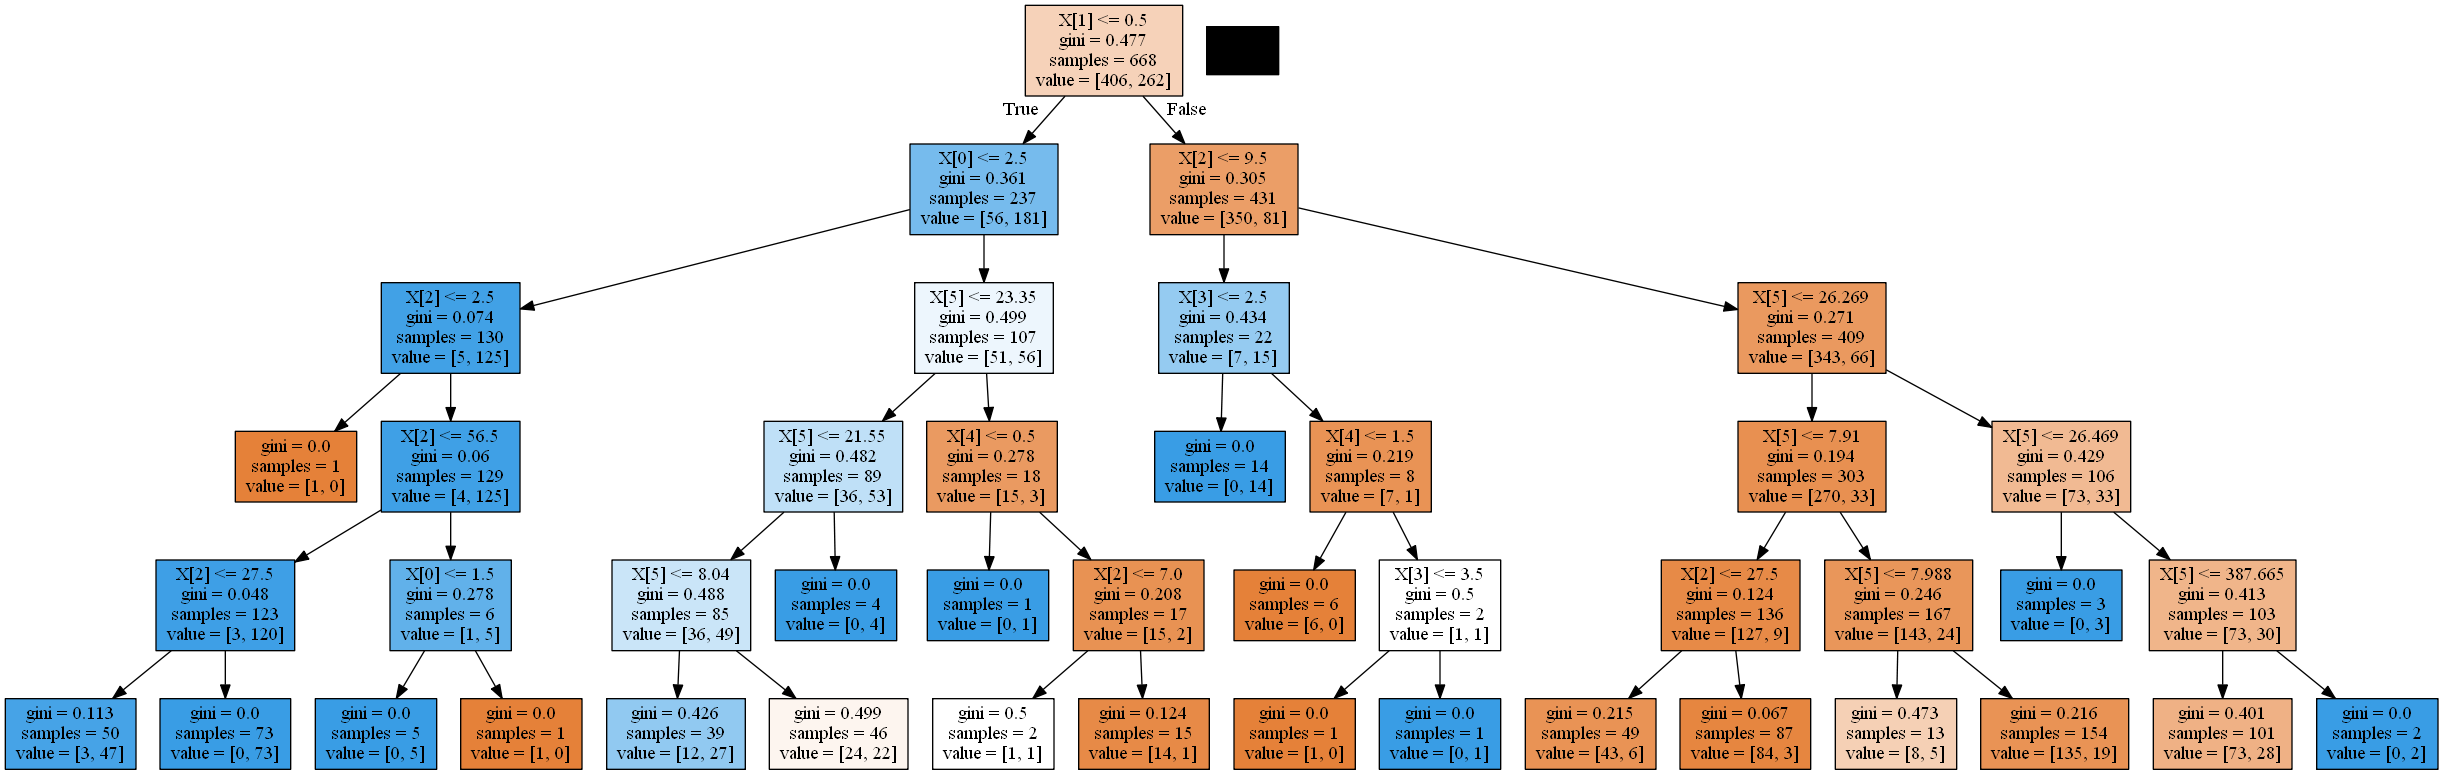

In [28]:
Image(graph.create_png())

# RANDOM FOREST CLASSIFIER

In [31]:
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train, Y_train)
sk_tree.score(X_train, Y_train)

0.9805389221556886

In [32]:
#Here we can see if we don't specify the depth , it overfits the data

In [33]:
sk_tree.score(X_test, Y_test)

0.7802690582959642

In [34]:
#Here test has a very less accuracy than the training set , hence we use random forest classifier

In [35]:
#Random Forest Implementation

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5)

In [43]:
rf.fit(X_train, Y_train)

C:\Users\KIIT\AppData\Local\Temp/ipykernel_8100/1297647196.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [44]:
rf.score(X_train, Y_train)

0.8458083832335329

In [45]:
rf.score(X_test, Y_test)

0.820627802690583

In [46]:
#Using Cross validation

In [47]:
from sklearn.model_selection import cross_val_score

In [49]:
acc = cross_val_score(RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

In [50]:
print(acc)   #validation set accuracy

0.812894175737852


In [52]:
acc_list = []
for i in range(1, 50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()
    acc_list.append(acc)
    
print(acc_list)    

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[0.7738413197172035, 0.8008753226349455, 0.7949276175513409, 0.8008865447200091, 0.7873975984737964, 0.8083380092021099, 0.803905285602065, 0.79947256200202, 0.8249018067556951, 0.8038940635170014, 0.811367972169229, 0.8114128605094827, 0.8099091011109865, 0.8188867691617101, 0.8114128605094827, 0.8203456402199528, 0.818909213331837, 0.8203568623050164, 0.8128941757378522, 0.8083716754573, 0.8248569184154416, 0.8039165076871283, 0.8218718437885759, 0.8188755470766468, 0.8174054539333409, 0.809875434855796, 0.8204017506452699, 0.8174054539333409, 0.8144203793064753, 0.8248905846706318, 0.8204129727303334, 0.8203680843900797, 0.8114128605094827, 0.8233531590169454, 0.8173717876781506, 0.8233643811020087, 0.8129053978229155, 0.8263718998990012, 0.8278532151273706, 0.8234092694422623, 0.8188979912467736, 0.8143418247110313, 0.820379306475143, 0.8218606217035125, 0.8188867691617101, 0.8278419930423071, 0.8219279542138931, 0.815912916619908, 0.8188755470766468]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


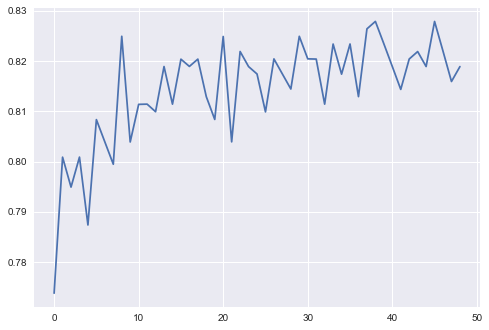

In [54]:
#plotting the accuracy list
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [55]:
print(np.argmax(acc_list))

38


In [56]:
#So we require 39 trees to get maximum accuracy

In [61]:
rf_best = RandomForestClassifier(n_estimators=39, max_depth=5, criterion='entropy')
rf_best.fit(X_train, Y_train)
rf_best.score(X_train, Y_train)

C:\Users\KIIT\AppData\Local\Temp/ipykernel_8100/1942184939.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(X_train, Y_train)


0.8607784431137725

In [62]:
rf_best.score(X_test, Y_test)

0.8340807174887892